<a href="https://colab.research.google.com/github/MKrezheska/data-mining-project/blob/main/4_Models_best2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
import seaborn as sn


#Вчитување на податоците

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/with_genres.csv")
df.shape

(1991, 23)

In [ ]:
df = df.drop(["Unnamed: 0.1","Unnamed: 0"], axis="columns")
df.head(100)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,popularity,uri,title,artist,year,target,genre
0,0.425,0.1000,135.128,0.3750,0.328000,0.130000,4,0.701,7,194088,-10.965,0.5620,1,audio_features,89,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,2019,1,22
1,0.125,0.2650,111.554,0.2390,0.751000,0.002070,4,0.521,9,243725,-17.832,0.0528,1,audio_features,78,spotify:track:4QIo4oxwzzafcBWkKjDpXY,xanny,Billie Eilish,2019,1,22
2,0.533,0.1390,150.455,0.1860,0.462000,0.219000,4,0.678,4,180953,-10.485,0.3230,1,audio_features,81,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,2019,1,22
3,0.444,0.1770,185.044,0.3720,0.283000,0.143000,4,0.726,8,168840,-8.922,0.5690,0,audio_features,80,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,Billie Eilish,2019,1,22
4,0.351,0.7520,118.028,0.2410,0.390000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,audio_features,81,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,Billie Eilish,2019,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.836,0.0550,132.937,0.0438,0.000143,0.000507,4,0.484,1,494773,-4.658,0.4030,1,audio_features,41,spotify:track:5jE2hljNVTJZeodUXQu9Ea,Fixxxer,Metallica,1997,1,26
96,0.903,0.0979,157.825,0.0314,0.000022,0.052200,4,0.426,10,304400,-4.535,0.4420,0,audio_features,48,spotify:track:3QWzxUE2WA5WoSi82KCODk,Ain't My Bitch,Metallica,1996,1,26
97,0.907,0.5490,115.217,0.0345,0.000005,0.008570,4,0.512,1,328200,-4.432,0.6730,0,audio_features,45,spotify:track:0SwHR5lvAfgI8Z2D6YgvMd,2 X 4,Metallica,1996,1,26
98,0.859,0.1550,94.437,0.0307,0.000018,0.003410,4,0.478,4,398867,-5.347,0.2860,1,audio_features,45,spotify:track:2UmXstEJ8nkpUUfQRYieC6,The House That Jack Built,Metallica,1996,1,26


In [ ]:
df.drop(['title','artist', 'uri', 'type'], axis=1, inplace=True)
df.head(1991)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target,genre
0,0.425,0.100,135.128,0.3750,0.32800,0.130000,4,0.701,7,194088,-10.965,0.5620,1,89,2019,1,22
1,0.125,0.265,111.554,0.2390,0.75100,0.002070,4,0.521,9,243725,-17.832,0.0528,1,78,2019,1,22
2,0.533,0.139,150.455,0.1860,0.46200,0.219000,4,0.678,4,180953,-10.485,0.3230,1,81,2019,1,22
3,0.444,0.177,185.044,0.3720,0.28300,0.143000,4,0.726,8,168840,-8.922,0.5690,0,80,2019,1,22
4,0.351,0.752,118.028,0.2410,0.39000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,81,2019,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.364,0.101,123.022,0.0287,0.54500,0.000069,4,0.340,9,203760,-8.331,0.1100,1,41,2019,0,16
1987,0.886,0.096,126.044,0.0443,0.00114,0.000014,4,0.490,8,213333,-5.404,0.4930,1,45,2019,0,16
1988,0.475,0.104,101.069,0.0265,0.34800,0.000025,4,0.475,2,275133,-7.319,0.1290,1,40,2019,0,16
1989,0.637,0.100,76.037,0.0313,0.24900,0.000006,4,0.568,7,192107,-5.977,0.4520,1,39,2019,0,16


In [ ]:
cols = ['genre']  + [col for col in df if col != 'genre']
df = df[cols]

In [ ]:
df.head(100)

,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target
0,22,0.425,0.1000,135.128,0.3750,0.328000,0.130000,4,0.701,7,194088,-10.965,0.5620,1,89,2019,1
1,22,0.125,0.2650,111.554,0.2390,0.751000,0.002070,4,0.521,9,243725,-17.832,0.0528,1,78,2019,1
2,22,0.533,0.1390,150.455,0.1860,0.462000,0.219000,4,0.678,4,180953,-10.485,0.3230,1,81,2019,1
3,22,0.444,0.1770,185.044,0.3720,0.283000,0.143000,4,0.726,8,168840,-8.922,0.5690,0,80,2019,1
4,22,0.351,0.7520,118.028,0.2410,0.390000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,81,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26,0.836,0.0550,132.937,0.0438,0.000143,0.000507,4,0.484,1,494773,-4.658,0.4030,1,41,1997,1
96,26,0.903,0.0979,157.825,0.0314,0.000022,0.052200,4,0.426,10,304400,-4.535,0.4420,0,48,1996,1
97,26,0.907,0.5490,115.217,0.0345,0.000005,0.008570,4,0.512,1,328200,-4.432,0.6730,0,45,1996,1
98,26,0.859,0.1550,94.437,0.0307,0.000018,0.003410,4,0.478,4,398867,-5.347,0.2860,1,45,1996,1


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(1991)

,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target
637,0,0.843,0.1990,101.855,0.0581,0.1370,0.005860,4,0.330,2,665600,-10.221,0.4740,1,51,1975,1
1570,19,0.634,0.0785,146.976,0.2590,0.0522,0.000000,4,0.878,9,192600,-5.098,0.5670,1,43,2018,0
1796,19,0.684,0.1330,153.990,0.0349,0.1440,0.000000,4,0.562,10,179120,-5.285,0.7030,0,53,2017,0
693,42,0.787,0.3190,103.992,0.0491,0.0733,0.000024,4,0.722,1,218280,-5.357,0.2160,0,12,2019,1
1371,16,0.720,0.1030,152.047,0.0327,0.0403,0.000000,4,0.439,7,195973,-4.927,0.3430,1,40,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0.881,0.1040,139.895,0.0561,0.0673,0.000041,4,0.437,2,237800,-4.934,0.5920,1,46,1980,1
1151,34,0.931,0.1040,109.983,0.0423,0.0592,0.000000,4,0.773,0,199387,-4.623,0.8370,0,9,2006,0
859,33,0.790,0.5740,108.033,0.0472,0.1200,0.000046,4,0.267,0,537040,-7.226,0.0623,1,52,2012,1
1981,16,0.921,0.0534,161.946,0.0712,0.1030,0.000000,4,0.469,8,248498,-4.841,0.8120,1,37,2019,0


#Делење на податочното множество на тренирачко, валидациско и тестирачко 

Делење на податочното множество на тренирачко, валидациско и тестирачко множество, 
    така што првите 70% од секоја од класите  се доделени во тренирачкото множество. 
    Следните 10% од секоја од класите влегуваат во валидациско множество, 
    а последните 20% од секоја од класите се дел од тестирачкото множество.
    На крај се прави shuffle на множествата (заедно со соодветните лабели).

In [ ]:
tmp = df.values.tolist().copy()
dataset =  [[row[i] if i != len(row)-1   else int(row[i]) for i in range(len(row))] for row in tmp]
print(tmp)
print(dataset)

bad_classes = [x for x in dataset if x[-1] == 0]
good_classes = [x for x in dataset if x[-1] == 1]

train_set =  bad_classes[:int(len(bad_classes) * 0.7)] + good_classes[:int(len(good_classes) * 0.7)]
val_set = bad_classes[int(len(bad_classes) * 0.7):int(len(bad_classes) * 0.8)] + good_classes[int(len(good_classes) * 0.7):int(len(good_classes) * 0.8)]
test_set =  bad_classes[int(len(bad_classes) * 0.8):] + good_classes[int(len(good_classes) * 0.8):]

train_x = [x[:-1] for x in train_set]
train_y = [x[-1] for x in train_set]
val_x = [x[:-1] for x in val_set]
val_y = [x[-1] for x in val_set]
test_x = [x[:-1] for x in test_set]
test_y = [x[-1] for x in test_set]


[[0.0, 0.843, 0.19899999999999998, 101.855, 0.0581, 0.13699999999999998, 0.00586, 4.0, 0.33, 2.0, 665600.0, -10.221, 0.474, 1.0, 51.0, 1975.0, 1.0], [19.0, 0.634, 0.0785, 146.976, 0.259, 0.0522, 0.0, 4.0, 0.878, 9.0, 192600.0, -5.098, 0.5670000000000001, 1.0, 43.0, 2018.0, 0.0], [19.0, 0.684, 0.133, 153.99, 0.0349, 0.14400000000000002, 0.0, 4.0, 0.562, 10.0, 179120.0, -5.285, 0.703, 0.0, 53.0, 2017.0, 0.0], [42.0, 0.787, 0.319, 103.992, 0.0491, 0.0733, 2.380000000000001e-05, 4.0, 0.722, 1.0, 218280.0, -5.357, 0.21600000000000005, 0.0, 12.0, 2019.0, 1.0], [16.0, 0.72, 0.10300000000000001, 152.047, 0.0327, 0.0403, 0.0, 4.0, 0.439, 7.0, 195973.0, -4.927, 0.34299999999999997, 1.0, 40.0, 2013.0, 0.0], [33.0, 0.78, 0.081, 124.949, 0.128, 0.0622, 0.0, 4.0, 0.7759999999999999, 10.0, 204347.0, -4.374, 0.6659999999999999, 0.0, 87.0, 2017.0, 1.0], [20.0, 0.637, 0.0919, 103.868, 0.33899999999999997, 0.027999999999999997, 0.0, 4.0, 0.794, 4.0, 177693.0, -6.29, 0.39299999999999996, 0.0, 72.0, 2020.0

In [ ]:
import collections
X_train = np.array(train_x)
y_train = np.array(train_y)
X_val = np.array(val_x)
y_val = np.array(val_y)
X_test = np.array(test_x)
y_test = np.array(test_y)

from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train,random_state=0)
X_val, y_val = shuffle(X_val, y_val,random_state=0)
X_test, y_test = shuffle(X_test, y_test,random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(collections.Counter(y_train))
print(collections.Counter(y_val))
print(collections.Counter(y_test))

(1392, 16) (200, 16) (399, 16)
(1392,) (200,) (399,)
Counter({1: 702, 0: 690})
Counter({1: 101, 0: 99})
Counter({1: 201, 0: 198})


In [ ]:
#80% train, 20% test
xtrain = np.concatenate((X_train,X_val)) 
ytrain = np.concatenate((y_train,y_val))  

#Наивен Баесов, Дрво на одлука и Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importances = list(rfc.feature_importances_)

most_important_feature = importances.index(max(importances))
least_important_feature = importances.index(min(importances))
print('Most important feature: '+ df.columns[most_important_feature])
print('Least important feature: '+ df.columns[least_important_feature])

Most important feature: genre
Least important feature: time_signature


In [ ]:
from sklearn.metrics import classification_report

test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

print('Decision Tree score on test:\n', classification_report( y_test,test_tree_predict))
print('Naive Bayes score on test:\n', classification_report( y_test,test_naive_predict))
print('Random Forest score on test:\n', classification_report( y_test,test_random_forest_predict))

Decision Tree score on test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       198
           1       0.93      0.93      0.93       201

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399

Naive Bayes score on test:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76       198
           1       0.85      0.53      0.65       201

    accuracy                           0.72       399
   macro avg       0.75      0.72      0.71       399
weighted avg       0.75      0.72      0.71       399

Random Forest score on test:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       198
           1       0.95      0.90      0.92       201

    accuracy                           0.92       399
   macro avg       0.93      0.93      0

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15


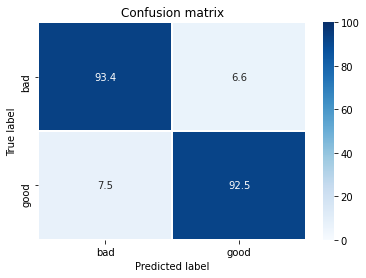

In [ ]:
confusion = confusion_matrix(y_test, test_tree_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results = pd.DataFrame(columns = ["Model", "Acc","Recall","ROC","TP","FN"])
df_Results.loc[0, "Model"] = "Decision Tree "
df_Results.loc[0, "Acc"] = accuracy_score(y_test, test_tree_predict)
df_Results.loc[0, "Recall"] = recall_score(y_test, test_tree_predict)
df_Results.loc[0, "ROC"] = roc_auc_score(y_test,test_tree_predict)
df_Results.loc[0, "TP"] = TP
df_Results.loc[0, "FN"] = FN


import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија 
names = ['bad', 'good'] 

confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()


,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21


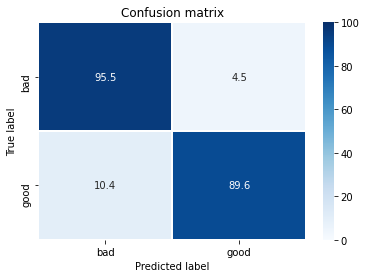

In [ ]:
confusion = confusion_matrix(y_test, test_random_forest_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[1, "Model"] = "Random Forest"
df_Results.loc[1, "Acc"] = accuracy_score(y_test, test_random_forest_predict)
df_Results.loc[1, "Recall"] = recall_score(y_test, test_random_forest_predict)
df_Results.loc[1, "ROC"] = roc_auc_score(y_test,test_random_forest_predict)
df_Results.loc[1, "TP"] = TP
df_Results.loc[1, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија 
names = ['bad', 'good'] 

confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94


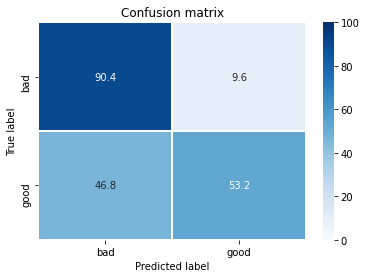

In [ ]:
confusion = confusion_matrix(y_test, test_naive_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[2, "Model"] = "Naive Bayes"
df_Results.loc[2, "Acc"] = accuracy_score(y_test, test_naive_predict)
df_Results.loc[2, "Recall"] = recall_score(y_test, test_naive_predict)
df_Results.loc[2, "ROC"] = roc_auc_score(y_test,test_naive_predict)
df_Results.loc[2, "TP"] = TP
df_Results.loc[2, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија 
names = ['bad', 'good'] 

confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head(3)

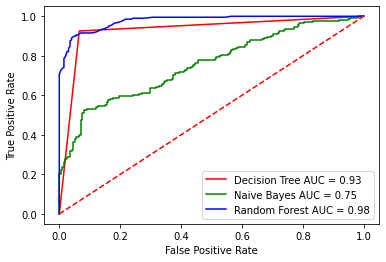

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]

dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Random Forest со подесени параметри

Best score: 0.938
Best parameters set:
	 bootstrap: True
	 criterion: 'entropy'
	 max_depth: None
	 max_features: None
	 max_samples: 0.5
	 min_samples_leaf: 1
	 min_samples_split: 5
	 n_estimators: 100
	 oob_score: False
	 random_state: None
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       198
           1       0.98      0.95      0.96       201

    accuracy                           0.96       399
   macro avg       0.97      0.97      0.96       399
weighted avg       0.97      0.96      0.96       399

accuracy:  0.9649122807017544




[]

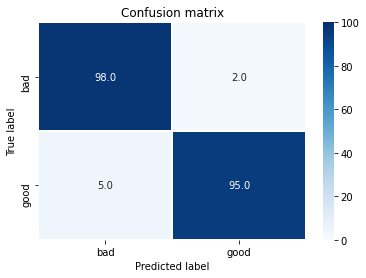

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          # 'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
# Визуелизација со матрица на конфузија 
cm=confusion_matrix(y_test,y_pred)
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[3, "Model"] = "Tuned Random Forest"
df_Results.loc[3, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[3, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[3, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[3, "TP"] = TP
df_Results.loc[3, "FN"] = FN

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10


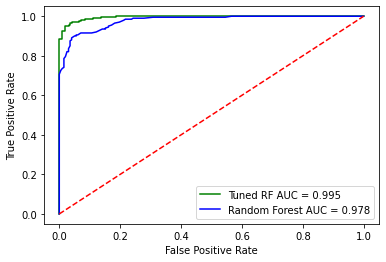

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
gs_rf_prob = [p[1] for p in gs_rf.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]



gs_rf_false_pos, gs_rf_true_pos, _ = roc_curve(actual, gs_rf_prob)
gs_rf_auc = auc(gs_rf_false_pos, gs_rf_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(gs_rf_false_pos, gs_rf_true_pos, 'g', label='Tuned RF AUC = %0.3f'% gs_rf_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.3f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Bagging Classifier

Best score: 0.847
Best parameters set:
	 base_estimator__max_depth: 5
	 base_estimator__max_features: None
	 base_estimator__min_samples_leaf: 1
	 base_estimator__min_samples_split: 5
	 bootstrap_features: True
	 max_features: 1.0
	 max_samples: 0.5
	 n_estimators: 5
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       198
           1       0.94      0.81      0.87       201

    accuracy                           0.88       399
   macro avg       0.89      0.88      0.88       399
weighted avg       0.89      0.88      0.88       399

accuracy:  0.8771929824561403




[]

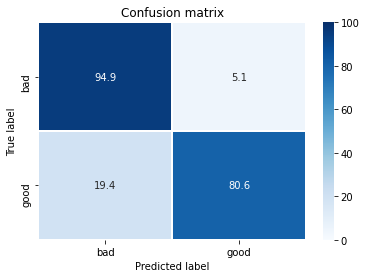

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, shuffle=True)

parameters5 = {"base_estimator__max_depth": [3,5,None],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 5],
          "base_estimator__min_samples_split": [2, 5],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators': [2, 5, 100],
         }

model_rf = BaggingClassifier(DecisionTreeClassifier(random_state=42))

gs5 = RandomizedSearchCV(model_rf, parameters5,scoring='accuracy',  n_jobs=3)
gs5.fit(xtrain, ytrain)

print("Best score: %0.3f" % gs5.best_score_) 
print("Best parameters set:" )
best_parameters5 = gs5.best_estimator_.get_params()
for param_name5 in sorted (parameters5 . keys()): 
                    print("\t %s: %r" % (param_name5, best_parameters5[param_name5]))
        
y_pred = gs5.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
# Визуелизација со матрица на конфузија 
cm=confusion_matrix(y_test,y_pred)
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[4, "Model"] = "Bagging Classifier"
df_Results.loc[4, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[4, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[4, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[4, "TP"] = TP
df_Results.loc[4, "FN"] = FN


In [ ]:
df_Results.head(5)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39


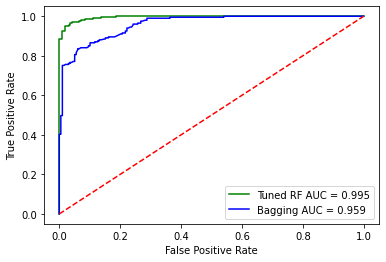

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
gs5_prob = [p[1] for p in gs_rf.predict_proba(X_test)]
bagging_prob = [p[1] for p in gs5.predict_proba(X_test)]



gs5_false_pos, gs5_true_pos, _ = roc_curve(actual, gs5_prob)
gs5_auc = auc(gs5_false_pos, gs5_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, bagging_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(gs5_false_pos, gs5_true_pos, 'g', label='Tuned RF AUC = %0.3f'% gs5_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Bagging AUC = %0.3f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#XGBOOST

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.960
Best parameters set:
	 colsample_bytree: 0.9310027847448368
	 gamma: 2.4271218554791196
	 learning_rate: 0.2282336457043735
	 max_depth: 8
	 min_child_weight: 7.183432442939054
	 n_estimators: 35
	 reg_alpha: 0.6721642969744801
	 subsample: 0.9943412796064232
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       198
           1       0.98      0.97      0.97       201

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399

accuracy:  0.974937343358396




[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.0s finished


[]

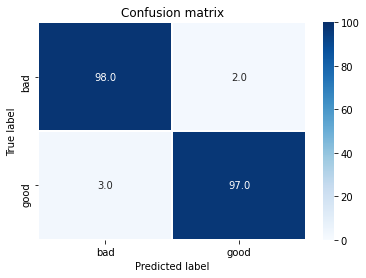

In [ ]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV

model_xg = XGBClassifier(random_state=42,n_jobs=-1)

one_to_left = st.beta(10, 1) 

parameters6 = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

xgb = RandomizedSearchCV(model_xg,parameters6, scoring='accuracy', n_iter=25, verbose= True)

xgb.fit(xtrain, ytrain)

print("Best score: %0.3f" % xgb.best_score_) 
print("Best parameters set:" )
best_parameters6 = xgb.best_estimator_.get_params()
for param_name6 in sorted (parameters6 . keys()): 
                    print("\t %s: %r" % (param_name6, best_parameters6[param_name6]))
        
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
# Визуелизација со матрица на конфузија 
cm=confusion_matrix(y_test,y_pred)
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

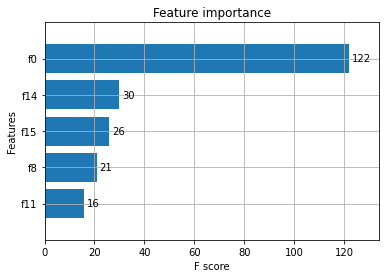

In [ ]:
from xgboost import plot_importance
#f0 e genre, f14 e popularity
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.912281,0.880597,0.912521,177,24
5,XGBoost,0.974937,0.970149,0.974974,195,6


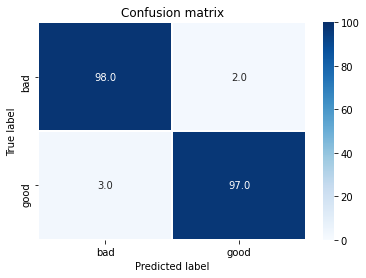

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[5, "Model"] = "XGBoost"
df_Results.loc[5, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[5, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[5, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[5, "TP"] = TP
df_Results.loc[5, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија 
names = ['bad', 'good'] 

confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head(10)

#Пример невронскa мрежa

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense   
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
classifier = Sequential()

classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=16))

classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(1, activation='sigmoid'))


classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
history_callback = classifier.fit(X_train_norm, y_train, epochs=500, batch_size=260,validation_data=(X_val_norm,y_val), callbacks=[es])


Epoch 1/500
6/6 [==============================] - 0s 20ms/step - loss: 0.6869 - accuracy: 0.5345 - val_loss: 0.6773 - val_accuracy: 0.5650
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.6494 - val_loss: 0.6609 - val_accuracy: 0.6450
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6882 - val_loss: 0.6386 - val_accuracy: 0.6700
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6316 - accuracy: 0.7177 - val_loss: 0.6108 - val_accuracy: 0.6900
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.7328 - val_loss: 0.5798 - val_accuracy: 0.6950
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7392 - val_loss: 0.5488 - val_accuracy: 0.7000
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7478 - val_loss: 0.5205 - val_accuracy: 0.7300
Epoch 8/500
6/6 [=========

In [ ]:
from sklearn.metrics import classification_report

probs       = classifier.predict(X_test_norm)
preds       = probs > 0.5
print('Neural network score on test:\n',classification_report(y_test, preds))

Neural network score on test:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       198
           1       0.86      0.83      0.84       201

    accuracy                           0.85       399
   macro avg       0.85      0.85      0.85       399
weighted avg       0.85      0.85      0.85       399



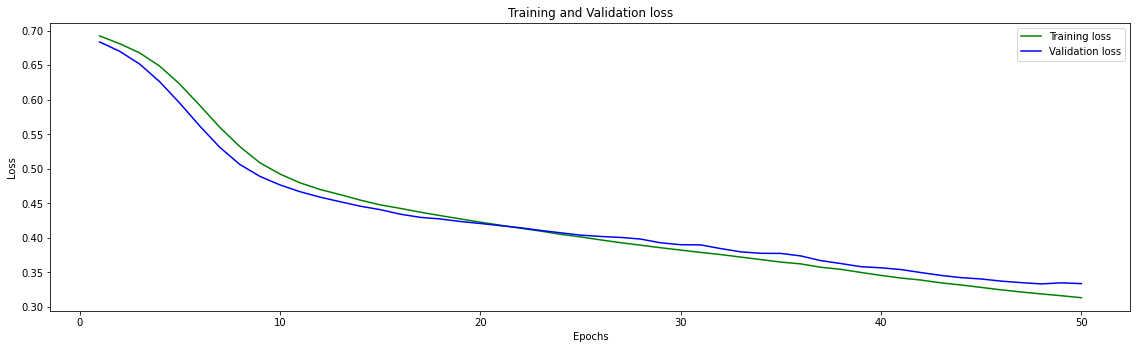

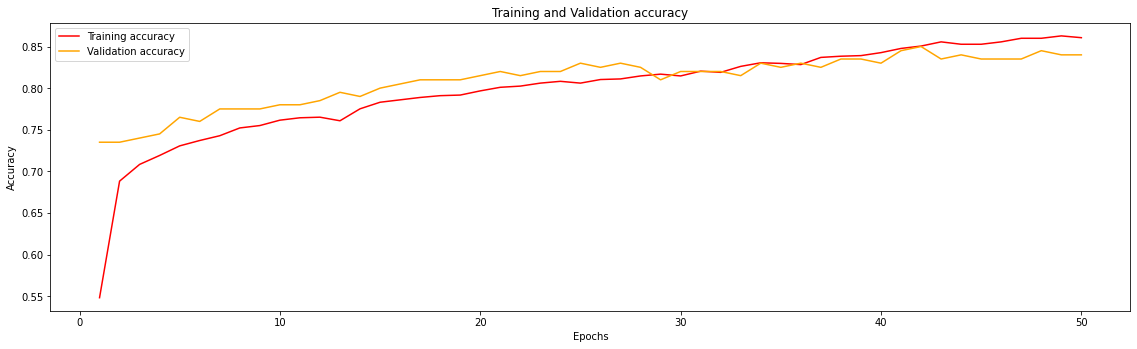

In [ ]:
# Визуелизација на вредностите на функцијата на загуба при тренирање и валидација
import matplotlib.pyplot as plt

loss_train = np.asarray(history_callback.history['loss'])
loss_val = np.asarray(history_callback.history['val_loss'])
epochs = range(1,loss_train.shape[0]+1)
plt.axes([0,0,2.5,1])
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Визуелизација на вредностите на accuracy при тренирање и валидација
acc_train = np.asarray(history_callback.history['accuracy'])
acc_val = np.asarray(history_callback.history['val_accuracy'])
epochs = range(1,acc_train.shape[0]+1)
plt.axes([0,0,2.5,1])
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[]

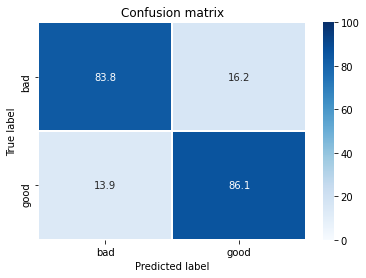

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

cm=confusion_matrix(y_test,preds)
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  
 

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

In [ ]:
confusion = confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


df_Results.loc[6, "Model"] = "ANN"
df_Results.loc[6, "Acc"] = accuracy_score(y_test, preds)
df_Results.loc[6, "Recall"] = recall_score(y_test, preds)
df_Results.loc[6, "ROC"] = roc_auc_score(y_test,preds)
df_Results.loc[6, "TP"] = TP
df_Results.loc[6, "FN"] = FN

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39
5,XGBoost,0.974937,0.970149,0.974974,195,6
6,ANN,0.849624,0.860697,0.84954,173,28


In [ ]:
#Зачувување на моделот и тежините
classifier.save("/content/drive/My Drive/neural_network_podobra.h5")
classifier.save_weights("/content/drive/My Drive/neural_network_podobra_weights.h5")

In [ ]:
# Зачувување на вредностите на функцијата на загуба при тренирање и валидација
np.savetxt("/content/drive/My Drive/loss_train_podobra.txt", loss_train, delimiter=",")
np.savetxt("/content/drive/My Drive/loss_val_podobra.txt", loss_val, delimiter=",")
np.savetxt("/content/drive/My Drive/acc_train_podobra.txt", acc_train, delimiter=",")
np.savetxt("/content/drive/My Drive/acc_val_podobra.txt", acc_val, delimiter=",")

In [ ]:
#Пример за вчитување на зачуваниот модел
from tensorflow.keras.models import load_model

model2 = load_model("/content/drive/My Drive/neural_network_podobra.h5")
probs       = model2.predict(X_test_norm)
preds       = probs > 0.5

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

cm=confusion_matrix(y_test,preds)
names = ['bad', 'good'] 
cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  
 

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

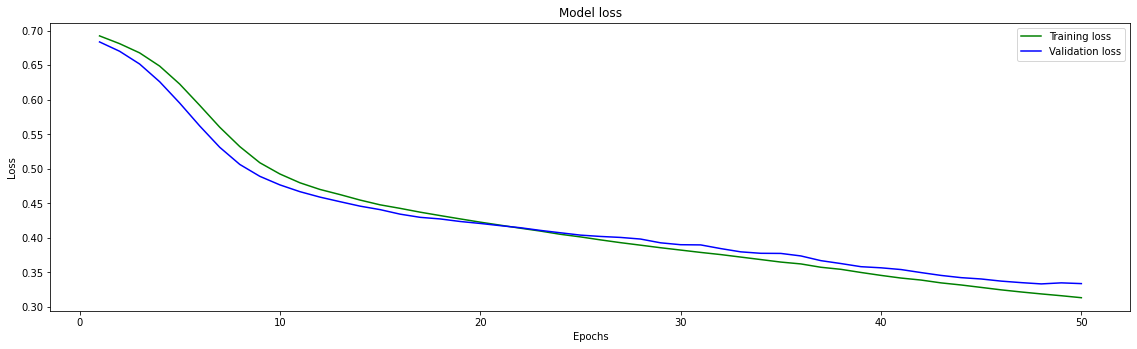

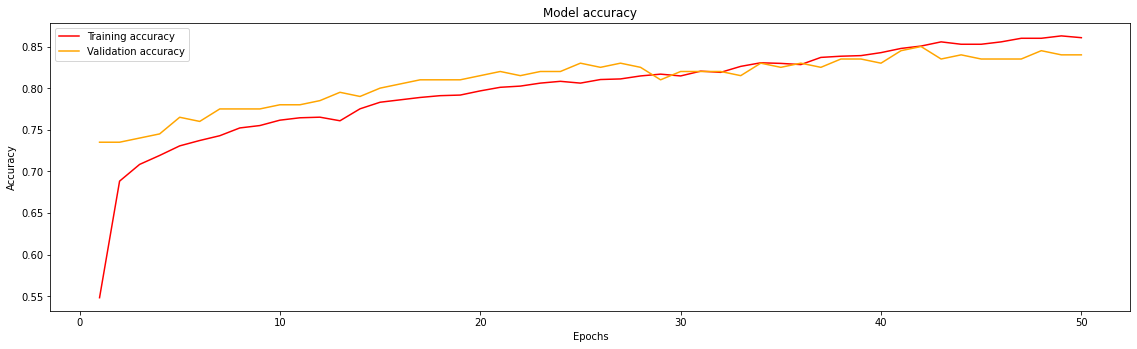

In [ ]:
tmp1 = np.loadtxt("/content/drive/My Drive/loss_train_podobra.txt", delimiter=",")
tmp2 = np.loadtxt("/content/drive/My Drive/loss_val_podobra.txt", delimiter=",")
epochs = range(1,tmp1.shape[0]+1)
plt.axes([0,0,2.5,1])
plt.plot(epochs, tmp1, 'g', label='Training loss')
plt.plot(epochs, tmp2, 'b', label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

tmp1 = np.loadtxt("/content/drive/My Drive/acc_train_podobra.txt", delimiter=",")
tmp2 = np.loadtxt("/content/drive/My Drive/acc_val_podobra.txt", delimiter=",")
epochs = range(1,tmp1.shape[0]+1)
plt.axes([0,0,2.5,1])
plt.plot(epochs, tmp1, 'r', label='Training accuracy')
plt.plot(epochs, tmp2, 'orange', label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

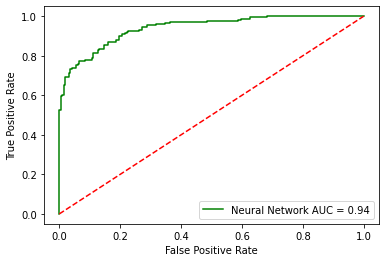

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
NN_prob = [p[0] for p in classifier.predict(X_test_norm)]



NN_false_pos, NN_true_pos, _ = roc_curve(actual, NN_prob)
NN_auc = auc(NN_false_pos, NN_true_pos)


# plot
plt.plot(NN_false_pos, NN_true_pos, 'g', label='Neural Network AUC = %0.2f'% NN_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#K-Nearest Neighbor

In [ ]:
#80% train, 20% test
xtrain_norm = np.concatenate((X_train_norm,X_val_norm)) 
ytrain_norm = np.concatenate((y_train,y_val))  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn_model = KNeighborsClassifier() 
knn_model.fit(xtrain_norm, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       198
           1       0.87      0.77      0.82       201

    accuracy                           0.82       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.82      0.82       399



[]

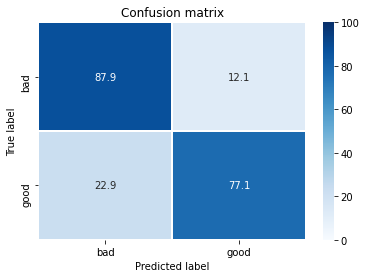

In [ ]:
pred = knn_model.predict(X_test_norm)
print(classification_report(y_test, pred))
# Визуелизација со матрица на конфузија
cm=confusion_matrix(y_test,pred)
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()


In [ ]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[7, "Model"] = "KNN"
df_Results.loc[7, "Acc"] = accuracy_score(y_test, pred)
df_Results.loc[7, "Recall"] = recall_score(y_test, pred)
df_Results.loc[7, "ROC"] = roc_auc_score(y_test,pred)
df_Results.loc[7, "TP"] = TP
df_Results.loc[7, "FN"] = FN

df_Results.head(8)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39
5,XGBoost,0.974937,0.970149,0.974974,195,6
6,ANN,0.849624,0.860697,0.84954,173,28
7,KNN,0.824561,0.771144,0.824966,155,46


#KNN со подесени параметри

Tuned KNN Parameters: {'n_neighbors': 11, 'weights': 'distance'}
Best score is 0.9369648828949918
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       198
           1       0.91      0.79      0.84       201

    accuracy                           0.85       399
   macro avg       0.86      0.86      0.85       399
weighted avg       0.86      0.85      0.85       399



[]

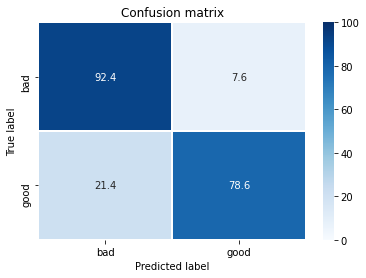

In [ ]:
from sklearn.model_selection import GridSearchCV

param_KNN = {"n_neighbors": np.arange(1, 20),
              "weights": ['uniform','distance']}

# Instantiate the GridSearchCV object: logreg_cv
KNN_cv = GridSearchCV(knn_model, param_KNN, cv=5, scoring='roc_auc')

# Fit it to the data
KNN_cv.fit(xtrain_norm, ytrain)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(KNN_cv.best_params_)) 
print("Best score is {}".format(KNN_cv.best_score_))
print(classification_report(y_test, KNN_cv.predict(X_test_norm) ))

cm=confusion_matrix(y_test,KNN_cv.predict(X_test_norm))
names = ['bad', 'good'] 

cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

In [ ]:
confusion = confusion_matrix(y_test, KNN_cv.predict(X_test_norm))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[8, "Model"] = "Tuned KNN"
df_Results.loc[8, "Acc"] = accuracy_score(y_test, KNN_cv.predict(X_test_norm))
df_Results.loc[8, "Recall"] = recall_score(y_test, KNN_cv.predict(X_test_norm))
df_Results.loc[8, "ROC"] = roc_auc_score(y_test,KNN_cv.predict(X_test_norm))
df_Results.loc[8, "TP"] = TP
df_Results.loc[8, "FN"] = FN

df_Results.head(9)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39
5,XGBoost,0.974937,0.970149,0.974974,195,6
6,ANN,0.849624,0.860697,0.84954,173,28
7,KNN,0.824561,0.771144,0.824966,155,46
8,Tuned KNN,0.854637,0.78607,0.855156,158,43


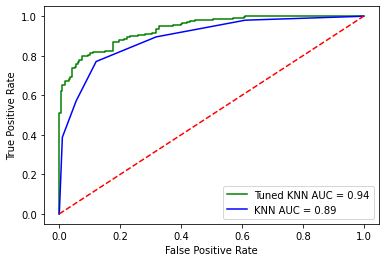

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
KNN_cv_prob = [p[1] for p in KNN_cv.predict_proba(X_test_norm)]
knn_model_prob = [p[1] for p in knn_model.predict_proba(X_test_norm)]



KNN_cv_false_pos, KNN_cv_true_pos, _ = roc_curve(actual, KNN_cv_prob)
KNN_cv_auc = auc(KNN_cv_false_pos, KNN_cv_true_pos)

knn_model_false_pos, knn_model_true_pos, _ = roc_curve(actual, knn_model_prob)
knn_model_auc = auc(knn_model_false_pos, knn_model_true_pos)

# plot
plt.plot(KNN_cv_false_pos, KNN_cv_true_pos, 'g', label='Tuned KNN AUC = %0.2f'% KNN_cv_auc)
plt.plot(knn_model_false_pos, knn_model_true_pos, 'b', label='KNN AUC = %0.2f'% knn_model_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#SVM

In [ ]:
X_train_norm = scaler.fit_transform(xtrain)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       198
           1       0.85      0.80      0.83       201

    accuracy                           0.83       399
   macro avg       0.83      0.83      0.83       399
weighted avg       0.83      0.83      0.83       399



[]

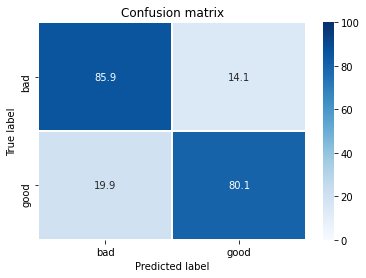

In [ ]:
from sklearn.svm import SVC
SVM = SVC()

SVM.probability = True
SVM.fit(X_train_norm, ytrain)

y_pred = SVM.predict(X_test_norm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


confusion = confusion_matrix(y_test,y_pred)
import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија 
names = ['bad', 'good'] 

confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

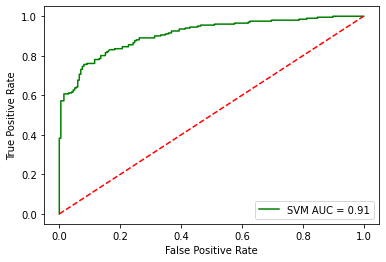

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
SVM_prob = [p[1] for p in SVM.predict_proba(X_test_norm)]


SVM_false_pos, SVM_true_pos, _ = roc_curve(actual, SVM_prob)
SVM_auc = auc(SVM_false_pos, SVM_true_pos)


# plot
plt.plot(SVM_false_pos, SVM_true_pos, 'g', label='SVM AUC = %0.2f'% SVM_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[9, "Model"] = "SVM"
df_Results.loc[9, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[9, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[9, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[9, "TP"] = TP
df_Results.loc[9, "FN"] = FN
df_Results = df_Results.astype({"TP": int, "FN": int})

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.929825,0.925373,0.929858,186,15
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.716792,0.532338,0.718189,107,94
3,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39
5,XGBoost,0.974937,0.970149,0.974974,195,6
6,ANN,0.849624,0.860697,0.84954,173,28
7,KNN,0.824561,0.771144,0.824966,155,46
8,Tuned KNN,0.854637,0.78607,0.855156,158,43
9,SVM,0.829574,0.800995,0.82979,161,40


#Extra

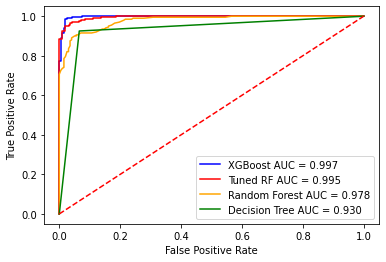

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
gs5_prob = [p[1] for p in gs_rf.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]
xgb_prob = [p[1] for p in xgb.predict_proba(X_test)]
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]

dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)


gs5_false_pos, gs5_true_pos, _ = roc_curve(actual, gs5_prob)
gs5_auc = auc(gs5_false_pos, gs5_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

xgb_false_pos, xgb_true_pos, _ = roc_curve(actual, xgb_prob)
xgb_auc = auc(xgb_false_pos, xgb_true_pos)

# plot
plt.plot(xgb_false_pos, xgb_true_pos, 'blue', label='XGBoost AUC = %0.3f'% xgb_auc)
plt.plot(gs5_false_pos, gs5_true_pos, 'red', label='Tuned RF AUC = %0.3f'% gs5_auc)
plt.plot(rf_false_pos, rf_true_pos, 'orange', label='Random Forest AUC = %0.3f'% rf_auc)
plt.plot(dt_false_pos, dt_true_pos, 'green', label='Decision Tree AUC = %0.3f'% dt_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
df_Results_sorted = df_Results.sort_values(by=['Acc'],ascending=False)
df_Results_sorted = df_Results_sorted.reset_index()
df_Results_sorted = df_Results_sorted.reindex(index=range(0,9))
df_Results_sorted = df_Results_sorted.drop('index',axis='columns')
df_Results_sorted.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,XGBoost,0.974937,0.970149,0.974974,195,6
1,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
2,Decision Tree,0.929825,0.925373,0.929858,186,15
3,Random Forest,0.924812,0.895522,0.925034,180,21
4,Bagging Classifier,0.877193,0.80597,0.877733,162,39
5,Tuned KNN,0.854637,0.78607,0.855156,158,43
6,ANN,0.849624,0.860697,0.84954,173,28
7,SVM,0.829574,0.800995,0.82979,161,40
8,KNN,0.824561,0.771144,0.824966,155,46


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
df_Results_sorted.to_csv("modeli4.csv")

In [ ]:
modeli = pd.read_csv("/content/drive/My Drive/modeli4.csv")
modeli = modeli.drop("Unnamed: 0", axis="columns")
modeli.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,XGBoost,0.974937,0.970149,0.974974,195,6
1,Tuned Random Forest,0.964912,0.950249,0.965023,191,10
2,Decision Tree,0.929825,0.925373,0.929858,186,15
3,Random Forest,0.924812,0.895522,0.925034,180,21
4,Bagging Classifier,0.877193,0.805970,0.877733,162,39
5,Tuned KNN,0.854637,0.786070,0.855156,158,43
6,ANN,0.849624,0.860697,0.849540,173,28
7,SVM,0.829574,0.800995,0.829790,161,40
8,KNN,0.824561,0.771144,0.824966,155,46
